In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("sample_data/london_weather.csv")
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [ ]:
df.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [ ]:
df['cloud_cover'].isna().value_counts()
cloud = df['cloud_cover'].loc[df['cloud_cover'].isnull() == False]
cloud_mean = cloud.mean()
df['cloud_cover'] = df['cloud_cover'].fillna(cloud_mean)

In [ ]:
df['global_radiation'].isna().value_counts()
radiation = df['global_radiation'].loc[df['global_radiation'].isnull() == False]
radiation_mean = radiation.mean()
df['global_radiation'] = df['global_radiation'].fillna(radiation_mean)

In [ ]:
df['max_temp'].isna().value_counts()
max_temp = df['max_temp'].loc[df['max_temp'].isnull() == False]
max_temp_mean = max_temp.mean()
df['max_temp'] = df['max_temp'].fillna(max_temp_mean)

In [ ]:
df['mean_temp'].isna().value_counts()
rata_temp = df['mean_temp'].loc[df['mean_temp'].isnull() == False]
rata_temp_mean = rata_temp.mean()
df['mean_temp'] = df['mean_temp'].fillna(rata_temp_mean)

In [ ]:
df['min_temp'].isna().value_counts()
min_temp = df['min_temp'].loc[df['min_temp'].isnull() == False]
min_temp_mean = min_temp.mean()
df['min_temp'] = df['min_temp'].fillna(min_temp_mean)

In [ ]:
df['precipitation'].isna().value_counts()
precipitation = df['precipitation'].loc[df['precipitation'].isnull() == False]
precipitation_mean = precipitation.mean()
df['precipitation'] = df['precipitation'].fillna(precipitation_mean)

In [ ]:
df['pressure'].isna().value_counts()
pressure = df['pressure'].loc[df['pressure'].isnull() == False]
pressure_mean = pressure.mean()
df['pressure'] = df['pressure'].fillna(pressure_mean)

In [ ]:
df['snow_depth'].isna().value_counts()
snow_depth = df['snow_depth'].loc[df['snow_depth'].isnull() == False]
snow_depth_mean = snow_depth.mean()
df['snow_depth'] = df['snow_depth'].fillna(snow_depth_mean)

In [ ]:
df.isnull().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

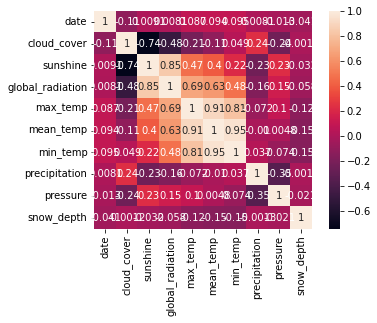

In [ ]:
#plotting heatmap 
sns.heatmap(df.corr(), square=True, annot=True)

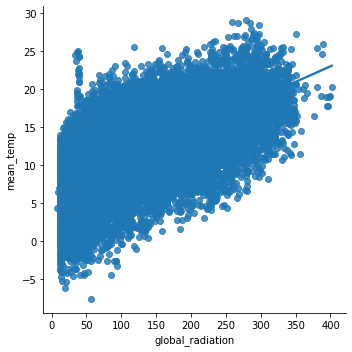

In [ ]:
sns.lmplot(x="global_radiation", y="mean_temp", data=df)

TRAINING DATA

In [ ]:
X = df[['sunshine', 'global_radiation', 'max_temp', 'min_temp']]
y = df[['mean_temp']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

UJI COBA

In [ ]:
regressor.coef_, regressor.intercept_

(array([[0.08661529, 0.00328254, 0.26579783, 0.71881044]]),
 array([1.18407306]))

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

def greet(sunshine, global_radiation, max_temp, min_temp):
  return regressor.predict([[sunshine, global_radiation, max_temp, min_temp]])[0]

demo = gr.Interface(
    fn=greet,
    inputs=["number"] * 4,
    examples=X_test[:5].to_numpy().tolist(),
    outputs="number")

demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://10245.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f0b07667e50>,
 'http://127.0.0.1:7860/',
 'https://10245.gradio.app')

In [ ]:
x = 14
y = 1.18407306 * x + 0.71881044
print(y)

17.29583328


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
regressor.score(X_test, y_test)

0.9740562080368976

In [ ]:
_pred = regressor.predict(X_test)

evaluate = pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Prediksi': y_pred.flatten()
})

evaluate.head(10)

,Actual,Prediksi
0,17.3,16.934877
1,7.4,6.648333
2,6.3,5.767602
3,11.2,10.841719
4,16.6,16.353535
5,13.8,14.371670
6,4.4,5.174985
7,14.4,14.781389
8,19.5,18.002147
9,15.4,15.451723


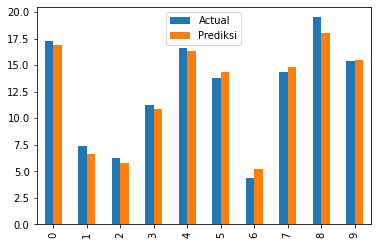

In [ ]:
evaluate.head(10).plot(kind="bar")

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

0.8482261089446922
